# CUSTOMER CHURN PREDICTION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

In [3]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [5]:
df.shape

(100000, 9)

In [6]:
df.duplicated().sum()

0

In [7]:
#checking unique values of categorical features
print(df['Location'].unique())
print(df['Gender'].unique())

['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']
['Male' 'Female']


In [8]:
# checking missing values
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [9]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [10]:
df.Location.value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [11]:
df.Gender.value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [12]:
df.Churn.value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

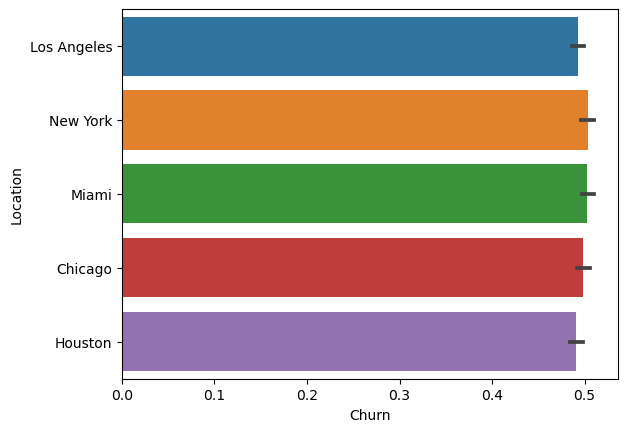

In [13]:
sns.barplot(x = 'Churn',y = 'Location',data = df)
plt.show()

In [14]:
data = df[['Age','Gender','Location','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Churn']]

In [15]:
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [16]:
#converting categorical features into dummy variables

In [17]:
data = pd.get_dummies(data, drop_first=True)

In [18]:
data.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,0,1
2,24,5,85.47,460,0,0,0,1,0,0
3,36,3,97.94,297,1,0,0,0,1,0
4,46,19,58.14,266,0,0,0,0,1,0


In [19]:
data.corr()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
Age,1.000000,0.003382,0.001110,0.001927,0.001559,0.000832,0.001795,-0.004971,0.001079,-0.003982
Subscription_Length_Months,0.003382,1.000000,-0.005294,-0.002203,0.002328,0.000320,-0.001842,-0.001234,0.005508,-0.004630
Monthly_Bill,0.001110,-0.005294,1.000000,0.003187,-0.000211,0.002239,0.001856,0.003444,-0.002521,0.002992
Total_Usage_GB,0.001927,-0.002203,0.003187,1.000000,-0.002842,-0.001385,-0.002137,-0.001562,0.001320,0.002837
Churn,0.001559,0.002328,-0.000211,-0.002842,1.000000,0.002121,-0.006728,-0.004807,0.005235,0.005835
Gender_Male,0.000832,0.000320,0.002239,-0.001385,0.002121,1.000000,0.006234,-0.001360,-0.001561,-0.002645
Location_Houston,0.001795,-0.001842,0.001856,-0.002137,-0.006728,0.006234,1.000000,-0.251548,-0.251469,-0.249757
Location_Los Angeles,-0.004971,-0.001234,0.003444,-0.001562,-0.004807,-0.001360,-0.251548,1.000000,-0.250563,-0.248857
Location_Miami,0.001079,0.005508,-0.002521,0.001320,0.005235,-0.001561,-0.251469,-0.250563,1.000000,-0.248779
Location_New York,-0.003982,-0.004630,0.002992,0.002837,0.005835,-0.002645,-0.249757,-0.248857,-0.248779,1.000000


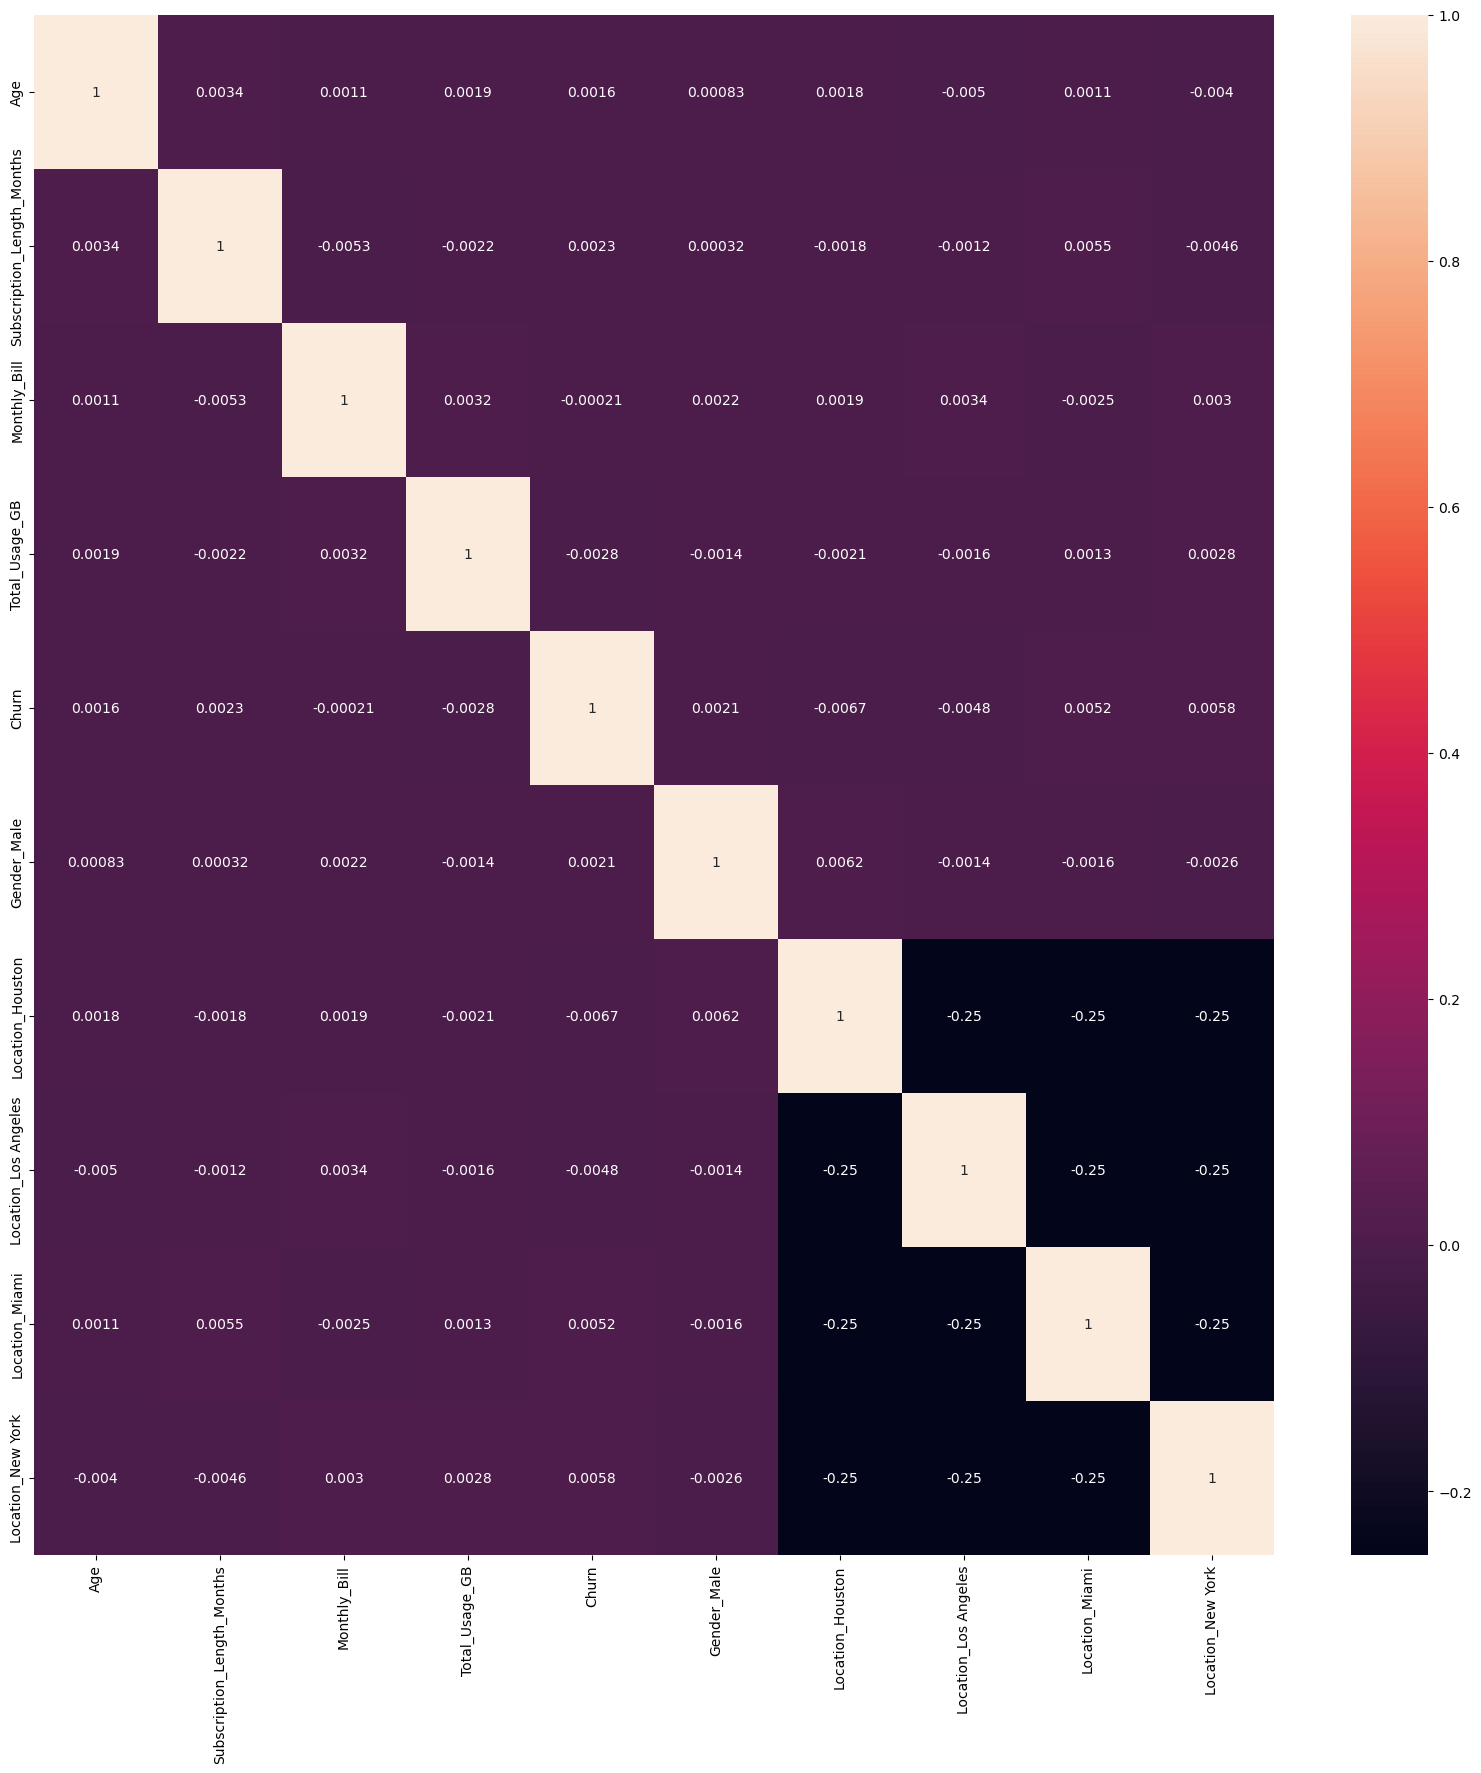

In [20]:
heatmap = data.corr()
plt.figure(figsize=(20,20))
hm = sns.heatmap(heatmap, annot=True)

In [21]:
X = data.drop(['Churn'], axis=1)

In [22]:
X.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,1,0,1,0,0
1,62,1,48.76,172,0,0,0,0,1
2,24,5,85.47,460,0,0,1,0,0
3,36,3,97.94,297,0,0,0,1,0
4,46,19,58.14,266,0,0,0,1,0


In [23]:
y = data['Churn']

In [24]:
y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

In [25]:
#splitting dataset

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=10)

In [27]:
X_train

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
56115,68,19,97.67,334,1,1,0,0,0
26487,58,3,51.44,108,0,0,0,1,0
75775,67,2,99.15,185,0,0,0,0,1
79623,54,10,66.42,185,1,1,0,0,0
81009,50,7,82.39,352,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
9372,30,16,80.15,423,1,1,0,0,0
93553,23,23,45.67,52,0,0,0,1,0
50496,55,19,47.70,396,0,1,0,0,0
94735,18,11,96.69,435,1,0,0,1,0


In [28]:
#feature scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train

array([[ 1.57273275,  0.94248842,  1.61551386, ..., -0.50109351,
        -0.49785621, -0.49857102],
       [ 0.91789752, -1.36568855, -0.67406533, ..., -0.50109351,
         2.00861207, -0.49857102],
       [ 1.50724923, -1.50994961,  1.6888121 , ..., -0.50109351,
        -0.49785621,  2.00573231],
       ...,
       [ 0.72144695,  0.94248842, -0.85929194, ..., -0.50109351,
        -0.49785621, -0.49857102],
       [-1.70144342, -0.21160006,  1.56697855, ..., -0.50109351,
         2.00861207, -0.49857102],
       [ 1.17983161,  1.66379373, -0.05103037, ..., -0.50109351,
         2.00861207, -0.49857102]])

# AdaBoost 

In [31]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [32]:
y_pred = ada.predict(X_test)

In [33]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.56      0.53     15108
           1       0.49      0.43      0.46     14892

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000



In [34]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[8531 6577]
 [8485 6407]]


In [35]:
# ## First we instantiate the models
# ada = AdaBoostClassifier()
# lin_svc = LinearSVC()
# ridge = RidgeClassifier()
# log_reg = LogisticRegression()

# ## Now we plot the parameters where grid search might try to find the best match
# parameters_ada = {'n_estimators':[10, 50, 250, 1000],
#               'learning_rate':[0.01, 0.1]}

# parameters_lin_svc = {'C':[1, 10, 100, 1000]}

# parameters_ridge = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0] , 
#                     "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

# parameters_log_reg = {'penalty' : ['l1', 'l2', 'elasticnet'], 
#                       'multi_class': ['auto', 'ovr', 'multinomial']}

# ## Now we set the grid search for each model
# grid_ada = GridSearchCV(ada, parameters_ada, n_jobs=1, verbose=0)
# grid_lin_svc = GridSearchCV(lin_svc, parameters_lin_svc, n_jobs=1, verbose=0)
# grid_ridge = GridSearchCV(ridge, parameters_ridge, n_jobs=1, verbose=0)
# grid_log_reg = GridSearchCV(log_reg, parameters_log_reg, n_jobs=1, verbose=0)

# ## We should fit those parameters into our tests dfs
# print('Running GridSearch for Adaboost...')
# grid_ada.fit(X_train, y_train)
# print('Running GridSearch for LinearSVC...')
# grid_lin_svc.fit(X_train, y_train)
# print('Running GridSearch for RidgeClassifier...')
# grid_ridge.fit(X_train, y_train)
# print('Running GridSearch for Logistic Regression...')
# grid_log_reg.fit(X_train, y_train)

# ## At last, we print the best parameters for each model
# best_ada = grid_ada.best_params_
# print('Best parameters for Adaboost:', best_ada)
# best_svc = grid_lin_svc.best_params_
# print('Best parameters for Linear SVC:', best_svc)
# best_ridge = grid_ridge.best_params_
# print('Best parameters for Ridge Classifier:', best_ridge)
# best_log = grid_log_reg.best_params_
# print('Best parameters for Logistic Regression:', best_log)

# ## Now we run the best parameters for each model
# ada_model = AdaBoostClassifier(n_estimators=best_ada['n_estimators'],
#               learning_rate=best_ada['learning_rate'])
# ada_model.fit(X_train, y_train)

# svc_model = LinearSVC(C=best_svc['C'])
# svc_model.fit(X_train, y_train)

# ridge_model = RidgeClassifier(alpha=best_ridge['alpha'], solver=best_ridge['solver'])
# ridge_model.fit(X_train, y_train)

# log_model = LogisticRegression(penalty=best_log['penalty'], multi_class=best_log['multi_class'])
# log_model.fit(X_train, y_train);

In [36]:
# ## Predict all the models
# ada_predict = ada_model.predict(X_test)
# svc_predict = svc_model.predict(X_test)
# ridge_predict = ridge_model.predict(X_test)
# log_predict = log_model.predict(X_test)

# ## Grab the best AUC Score
# auc_score = {'Adaboost': roc_auc_score(y_test, ada_predict), 
#              'Linear SVC': roc_auc_score(y_test, svc_predict), 
#              'Ridge Classifier': roc_auc_score(y_test, ridge_predict), 
#              'Logistic Regression': roc_auc_score(y_test, log_predict)}

# ## Obtain the highest value in the auc_score dictionary
# best = max(auc_score.items(), key = lambda x: x[1])
# print(f'The best performance model is {best[0]}, with an AUC Score of {best[1]}!')

In [37]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)

# ANN

In [38]:
# import tensorflow
# from tensorflow import keras
# from keras import Sequential
# from keras.layers import Dense

In [39]:
# model = keras.Sequential()
# #input layer and first hidden layer
# model.add(Dense(activation='relu', input_dim = 9, units = 6, kernel_initializer='uniform'))
# #hidden layer
# model.add(Dense(activation='relu', units = 6, kernel_initializer='uniform'))
# #output layer
# model.add(Dense(activation='sigmoid', units = 1, kernel_initializer='uniform'))


In [40]:
# model.summary()

In [41]:
# model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [42]:
# history = model.fit(X_train,y_train,  epochs=1)

In [43]:
# y_pred = model.predict(X_test)
# y_pred = (y_pred>0.5)

In [44]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)
# print(cm)

In [45]:
# from sklearn.metrics import confusion_matrix , classification_report
# print(classification_report(y_test, y_pred))

# Random Forest

In [46]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV



In [47]:
# parameters_clf = {'n_estimators':[10, 50, 250, 1000],
#               'max_features':['auto','sqrt'],
#                  'max_depth':[5,10,20,30],
#                  'min_samples_split':[2,5,10,30,60],
#                  'min_samples_leaf':[1,2,5,10]}
# print(parameters_clf)

In [48]:
# clf = RandomForestClassifier()

In [49]:
# clf_random = RandomizedSearchCV(estimator = clf, param_distributions = parameters_clf, scoring = "neg_mean_squared_error", n_iter = 10, cv= 5, verbose = 2, n_jobs=1)

In [50]:
# clf_random.fit(X_train, y_train)

In [51]:
# y_pred = clf_random.predict(X_test)

In [52]:
# from sklearn.metrics import confusion_matrix , classification_report

# print(classification_report(y_test, y_pred))

In [53]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)
# print(cm)
# print(acc)

# Logistic Regression

In [54]:
# from sklearn.linear_model import LogisticRegression
# regressor=LogisticRegression(random_state=100)
# regressor.fit(X_train,y_train)

In [55]:
# y_pred=regressor.predict(X_test)

In [56]:
# regressor.score(X_test,y_test)

In [57]:
# report=classification_report(y_test,y_pred)
# print(report)

In [58]:
# cm=confusion_matrix(y_test,y_pred)
# print(cm)

# Naive Bayes

In [59]:
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(X_train, y_train)

In [60]:
# y_pred=nb.predict(X_test)

In [61]:
# nb.score(X_test,y_test)

In [62]:
# report=classification_report(y_test,y_pred)
# print(report)

In [63]:
# cm=confusion_matrix(y_test,y_pred)
# print(cm)

# Decision tree

In [64]:
# from sklearn.tree import DecisionTreeClassifier
# d_tree = DecisionTreeClassifier()
# d_tree.fit(X_train,y_train)

In [65]:
# y_pred = d_tree.predict(X_test)

In [66]:
# d_tree.score(X_test,y_test)

In [67]:
# report=classification_report(y_test,y_pred)
# print(report)

In [68]:
# cm=confusion_matrix(y_test,y_pred)
# print(cm)

In [69]:
import pickle

file = open('customer_churn_prediction.pkl', 'wb')

pickle.dump(ada,file)